# STA-6543 Assignment 2

Jason Gillette

**Question 2** - Carefully explain the differences between the KNN classifier and KNN regression methods.

KNN classification and KNN regression are both non-parametric methods that make predictions based on the K nearest neighbors in the data. KNN classification predicts a class label by a majority vote, i.e. a class label defines a cluster of neighbors, while KNN regression predicts a continuous value by averaging the neighbors outputs. In contrast, parametric models like linear regression assumes a fixed functional form and thus offers greater statistical interpretability, KNN does not make an assumption of functional form, offering more flexibility but at the cost of potential over-fitting (especially with small K) and increased variance. KNN can struggle in high-dimensional spaces due to the "curse of dimensionality". While non-parametric methods like KNN adapt well to complex patterns, parametric approaches can still outperform when the underlying relationship is linear and the number of predictors is small.

**Question 9** -  The following questions involves the use of multiple linear regression on the Auto data set.

a. Produce a scatter-plot matrix which includes all of the variables in the data set.

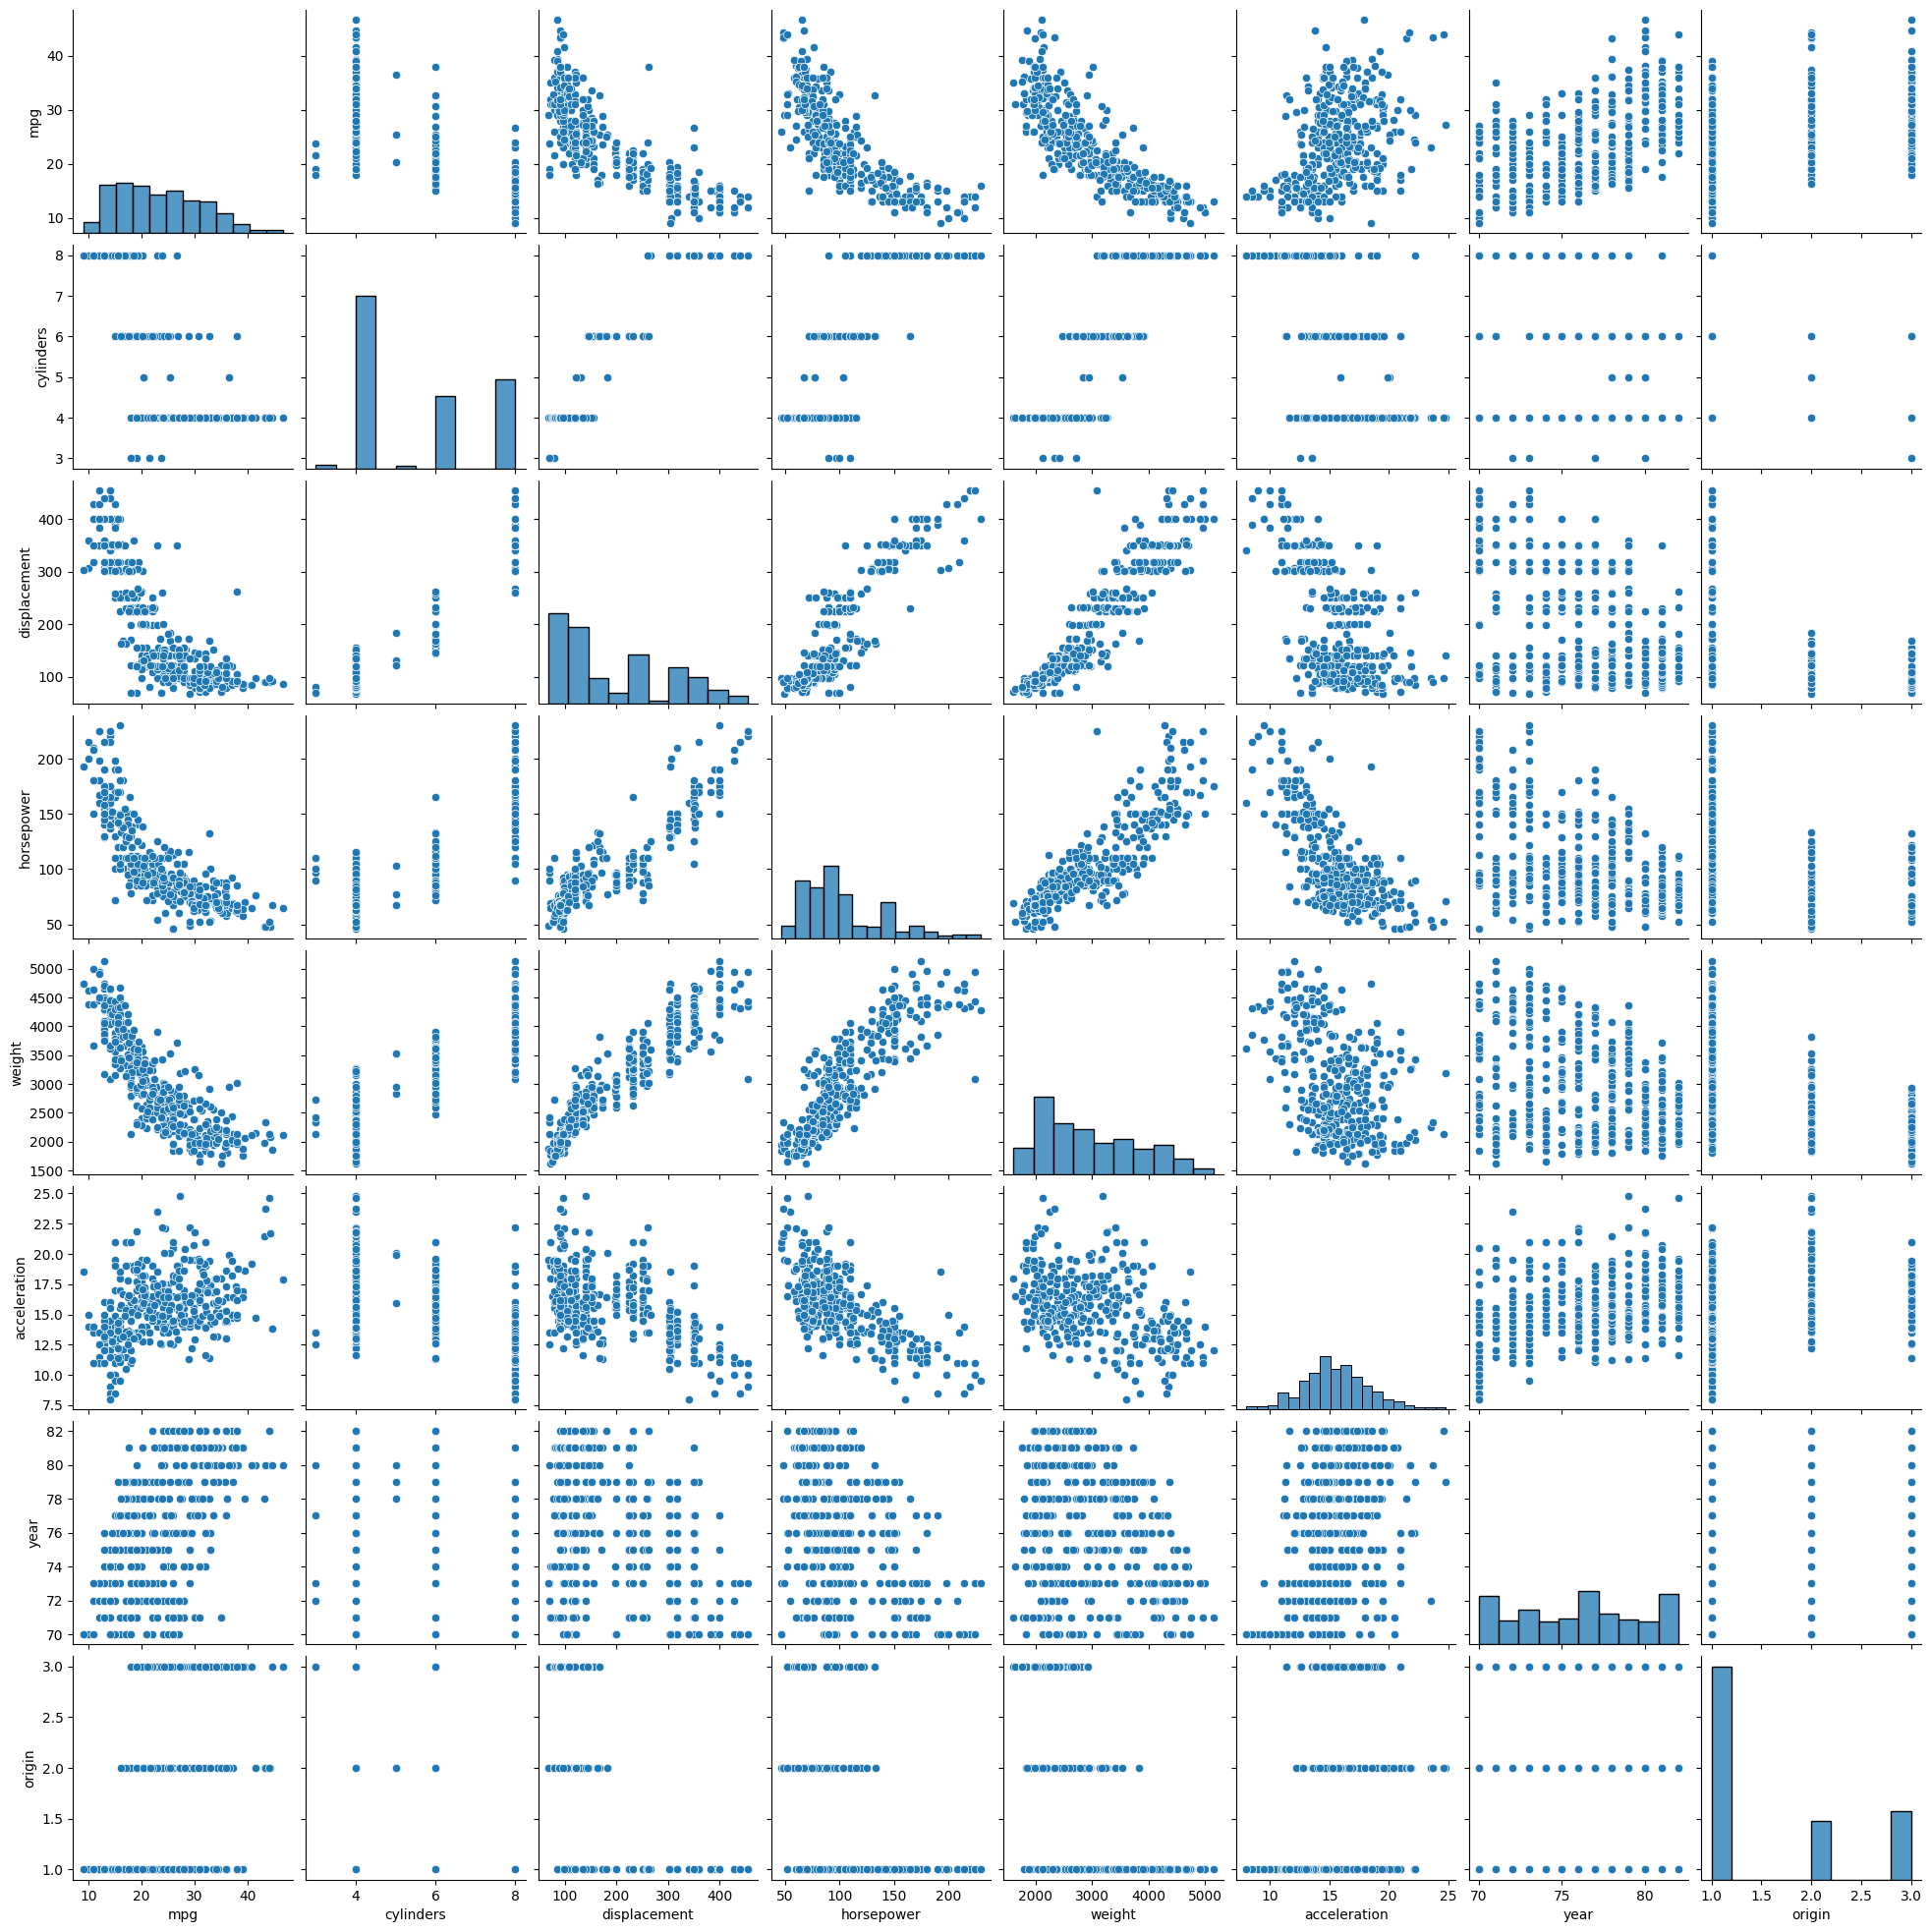

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
auto = pd.read_csv('/home/userj/projects/statisticum/Auto.csv')

# Preprocessing
auto.replace("?", np.nan, inplace=True)
auto.dropna(inplace=True)
auto['horsepower'] = pd.to_numeric(auto['horsepower'])

# Plot the scatter-plot matrix
sns.pairplot(auto)
plt.show()

b. Compute the matrix of correlations between the variables using the `DataFrame.corr()` method.

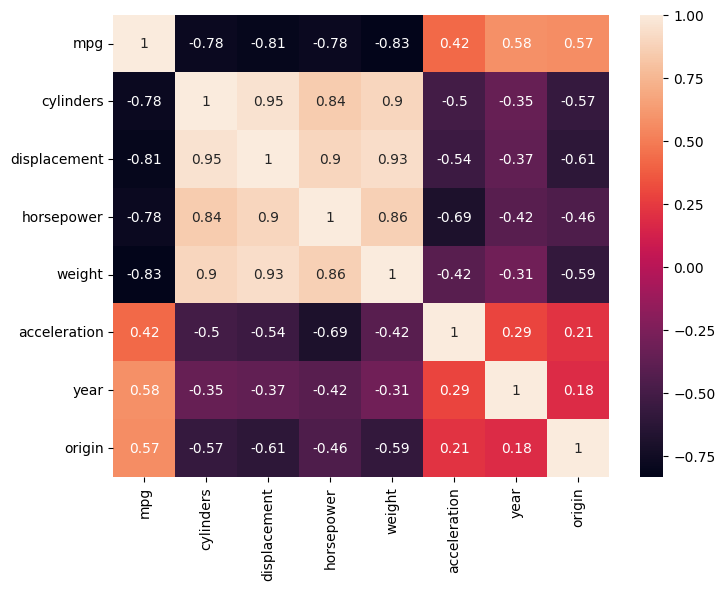

In [28]:
# Compute correlation matrix
correlation_matrix = auto.corr(numeric_only=True)

# Plot heatmap for readability
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

c. Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors, then use the summarize() function to print the results.

- i. Is there a relationship between the predictors and the response? Use the `anova_lm()` function from `statsmodels` to answer this question.

    - Cylinders is an extremely strong predictor of mpg. It has a very high F-value (over 1300) and a near-zero p-value, which means it explains a significant amount of variation in fuel efficiency and is almost certainly not due to chance.

    - Displacement also shows a strong relationship with mpg. Its F-value is high (around 97) and the p-value is far below 0.05, indicating that it contributes meaningful explanatory power to the model.

    - Horsepower is a significant predictor of mpg. While its F-value (about 36) is lower than displacement or weight, it’s still strong, and the p-value confirms it has a statistically significant impact.

    - Weight is another strong predictor, with an F-value around 88 and a p-value close to zero. This suggests a strong inverse relationship—heavier cars tend to have lower mpg.

    - Acceleration is not a significant predictor of mpg. Its F-value is very close to zero, and the high p-value (0.768) indicates that it likely has no real effect on mpg in this dataset.

    - Year is a very strong predictor of mpg. Its high F-value (over 200) and extremely small p-value suggest that newer cars tend to have better fuel efficiency, and this trend is highly statistically significant.

    - Origin (to my surprise!) shows a moderate but significant relationship with mpg. Its F-value is around 26, and the p-value is well below 0.05, meaning cars from different regions tend to differ in fuel efficiency in a meaningful way.

- ii. Which predictors appear to have a statistically significant relationship to the response?

    All predictors with a p-value greater than 0.5 demonstrate statistical significance, while cylinders and horsepower unsurprisingly have the greatest p-value. 

- iii. What does the coefficient for the year variable suggest?

    For every one-year increase in the car’s model year (e.g., from 1975 to 1976), the mpg increases by 0.75, assuming all other factors (like weight, horsepower) stay the same.

In [33]:
import statsmodels.api as sm

# Load copy
df = auto.copy()

# Drop non-numeric column 'name'
df = df.drop(columns=['name'])

# Define response and predictors
X = df.drop(columns=['mpg'])
y = df['mpg']

# Add constant
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Show summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          2.04e-139
Time:                        16:12:32   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Fit the model using formula (exclude 'name')
formula = 'mpg ~ ' + ' + '.join(col for col in df.columns if col not in ['mpg', 'name'])
model = smf.ols(formula, data=df).fit()

# Perform ANOVA
anova_results = anova_lm(model)

# Show results
anova_results

,df,sum_sq,mean_sq,F,PR(>F)
cylinders,1.0,14403.083079,14403.083079,1300.683788,2.319511e-125
displacement,1.0,1073.344025,1073.344025,96.929329,1.530906e-20
horsepower,1.0,403.408069,403.408069,36.430140,3.731128e-09
weight,1.0,975.724953,975.724953,88.113748,5.544461e-19
acceleration,1.0,0.966071,0.966071,0.087242,7.678728e-01
year,1.0,2419.120249,2419.120249,218.460900,1.875281e-39
origin,1.0,291.134494,291.134494,26.291171,4.665681e-07
Residual,384.0,4252.212530,11.073470,NaN,NaN


d.  Produce some of diagnostic plots of the linear regression ft as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

- **Residuals vs. Fitted** - The residuals vs fitted plot shows a mostly random scatter, but with a slight U-shaped pattern, suggesting that the linear model may not be fully capturing a non-linear relationship between the predictors and `mpg`. Additionally, the increasing spread of residuals at higher fitted values indicates heteroscedasticity—non-constant variance—which violates our assumption of linear regression and suggests that the model's predictions are less reliable for higher `mpg` values. The quantity of observation that stray from zero also suggests either a large quantity of outliers or the actual relationship of the data is not truly linear.

- **Leverage by Observation** - The leverage by observation plot largely points to normal behavior with most observation demonstrating similar influence on the model. However there are several points that are unusually high with one in particular showing nearly 7x the average. This observation may be skewing the model.

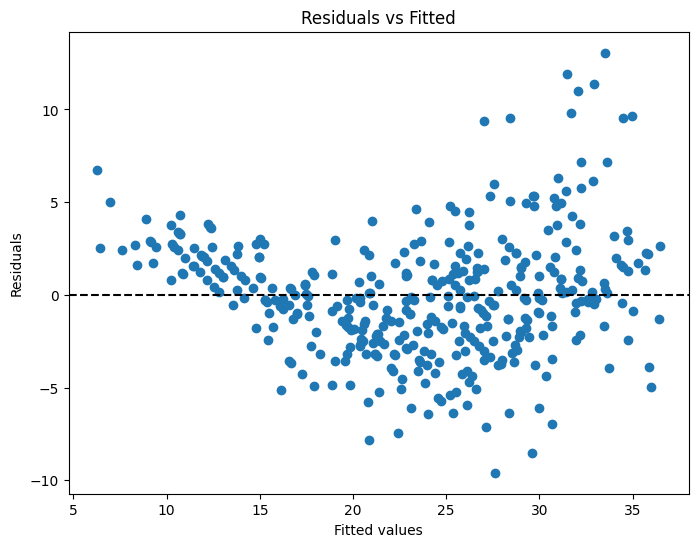

In [36]:
# diagnostic plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(model.fittedvalues, model.resid)
ax.set_xlabel('Fitted values')
ax.set_ylabel('Residuals')
ax.axhline(0, color='black', linestyle='--')
ax.set_title('Residuals vs Fitted')
plt.show()


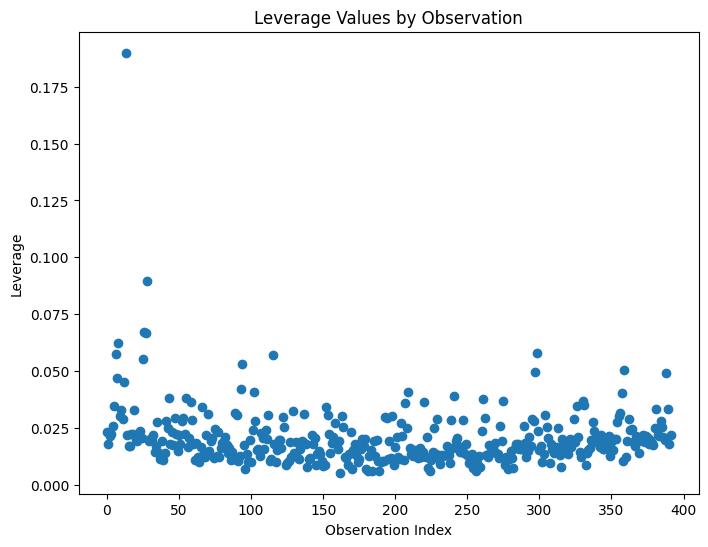

Observation with highest leverage: 13


In [37]:
# diagnostic plot
influence = model.get_influence()
leverage = influence.hat_matrix_diag

fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(np.arange(len(leverage)), leverage)
ax.set_xlabel('Observation Index')
ax.set_ylabel('Leverage')
ax.set_title('Leverage Values by Observation')
plt.show()

# Optionally: get the index of the point with highest leverage
most_leverage_index = np.argmax(leverage)
print(f'Observation with highest leverage: {most_leverage_index}')

e. Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

- Both interaction terms tested, `horsepower × weight` and `year × origin` were found to be statistically significant, with p-values effectively equal to 0. This indicates that, in both cases, there is strong evidence that the effect of one predictor on `mpg` depends on the level of another. However, while the `horsepower × weight` interaction also improved model performance as reflected by a high R-squared in the model summary, the `year × origin` interaction caused a  drop in R-squared, suggesting that it reduced the model’s ability to explain variance in `mpg`. Despite its statistical significance, the `year × origin` term appears to have little practical value.

In [40]:
from ISLP.models import ModelSpec # adopting from lab

# Define model specification with an interaction
spec = ModelSpec([
    'horsepower',
    'weight',
    ('horsepower', 'weight'),  # interaction term
    'year',
    'cylinders',
    'origin',
    'displacement',
    'acceleration'
])

# Load copy
df = auto.copy()

# Drop non-numeric column 'name'
df = df.drop(columns=['name'])

# Define response and predictors
X = df.drop(columns=['mpg'])
y = df['mpg']

# Generate design matrix
X = spec.fit_transform(df)
X = sm.add_constant(X)  # Add intercept
y = df['mpg']

# Fit the model
model = sm.OLS(y, X).fit()

# Display results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     298.6
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          1.88e-159
Time:                        18:11:54   Log-Likelihood:                -973.24
No. Observations:                 392   AIC:                             1964.
Df Residuals:                     383   BIC:                             2000.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept             2.8757      4.511      0.638      0.524      -5.993      11.744
horsepower           -0.2313      0.024     -9.791      0.000      -0.278      -0.185
weight               -0.0112      0.001    -15.393      0.000      -0.013      -0.010
horsepower:weight  5.529e-05   5.23e-06     10.577      0.000     4.5e-05    6.56e-05
year                  0.7695      0.045     17.124      0.000       0.681       0.858
cylinders            -0.0296      0.288     -0.103      0.918      -0.596       0.537
origin                0.8344      0.251      3.320      0.001       0.340       1.329
displacement          0.0059      0.007      0.881      0.379      -0.007       0.019
acceleration         -0.0902      0.089     -1.019      0.309      -0.264       0.084
==============================================================================
Omnibus:                       40.936   Durbin-Watson:                   1.474
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.199
Skew:                           0.629   Prob(JB):                     1.27e-16
Kurtosis:                       4.703   Cond. No.                     1.23e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.23e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
from ISLP.models import ModelSpec # adopting from lab

# Define model specification with an interaction
spec = ModelSpec([
    'horsepower',
    'weight',
    'horsepower',
    'weight',
    ('year', 'origin'), # interaction term
    'cylinders',
    'displacement',
    'acceleration'
])

# Load copy
df = auto.copy()

# Drop non-numeric column 'name'
df = df.drop(columns=['name'])

# Define response and predictors
X = df.drop(columns=['mpg'])
y = df['mpg']

# Generate design matrix
X = spec.fit_transform(df)
X = sm.add_constant(X)  # Add intercept
y = df['mpg']

# Fit the model
model = sm.OLS(y, X).fit()

# Display results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     174.6
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          1.38e-106
Time:                        18:15:21   Log-Likelihood:                -1103.6
No. Observations:                 392   AIC:                             2221.
Df Residuals:                     385   BIC:                             2249.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept       42.1469      2.659     15.853      0.000      36.920      47.374
horsepower      -0.0325      0.008     -3.973      0.000      -0.049      -0.016
weight          -0.0024      0.000     -6.139      0.000      -0.003      -0.002
horsepower      -0.0325      0.008     -3.973      0.000      -0.049      -0.016
weight          -0.0024      0.000     -6.139      0.000      -0.003      -0.002
year:origin      0.0252      0.004      5.816      0.000       0.017       0.034
cylinders       -0.6202      0.396     -1.566      0.118      -1.399       0.158
displacement     0.0167      0.009      1.817      0.070      -0.001       0.035
acceleration    -0.0272      0.121     -0.225      0.822      -0.265       0.210
==============================================================================
Omnibus:                       31.823   Durbin-Watson:                   0.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.345
Skew:                           0.605   Prob(JB):                     3.87e-10
Kurtosis:                       4.090   Cond. No.                     3.60e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.83e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

f. Try a few different transformations of the variables, such as `log(X)`, `√X`, `X2`. Comment on your findings.

- Including polynomial terms for horsepower and weight led to a slight improvement in adjusted R-squared compared to some earlier interaction models, suggesting a better overall fit. This aligns with intuition: the relationship between mpg and both horsepower and weight is unlikely to be strictly linear. 

In [42]:
from ISLP.models import poly

spec = ModelSpec([
    poly('horsepower', degree=2),  # horsepower and horsepower^2
    'weight',
    'year',
    'displacement',
    'cylinders',
    'acceleration',
    'origin'
])

# Load copy
df = auto.copy()

# Drop non-numeric column 'name'
df = df.drop(columns=['name'])

# Define response and predictors
X = df.drop(columns=['mpg'])
y = df['mpg']

X = spec.fit_transform(df)
X = sm.add_constant(X)
y = df['mpg']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     282.8
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          1.42e-155
Time:                        18:26:43   Log-Likelihood:                -982.41
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     383   BIC:                             2019.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                       -19.5846      3.797     -5.158      0.000     -27.050     -12.119
poly(horsepower, degree=2)[0]   -51.2873     10.297     -4.981      0.000     -71.533     -31.041
poly(horsepower, degree=2)[1]    36.0442      3.815      9.449      0.000      28.544      43.544
weight                           -0.0033      0.001     -4.820      0.000      -0.005      -0.002
year                              0.7353      0.046     15.989      0.000       0.645       0.826
displacement                     -0.0076      0.007     -1.026      0.306      -0.022       0.007
cylinders                         0.3489      0.305      1.145      0.253      -0.250       0.948
acceleration                     -0.3306      0.099     -3.333      0.001      -0.526      -0.136
origin                            1.0144      0.255      3.985      0.000       0.514       1.515
==============================================================================
Omnibus:                       28.137   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.389
Skew:                           0.470   Prob(JB):                     5.12e-11
Kurtosis:                       4.421   Cond. No.                     2.14e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.14e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [44]:
spec = ModelSpec([
    'sqrt_weight',
    'horsepower',
    'year',
    'cylinders',
    'origin'
])

# Load copy
df = auto.copy()

# Drop non-numeric column 'name'
df = df.drop(columns=['name'])

# Define response and predictors
X = df.drop(columns=['mpg'])
y = df['mpg']

# new feature
df['sqrt_weight'] = np.sqrt(df['weight'])

X = spec.fit_transform(df)
X = sm.add_constant(X)
y = df['mpg']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     380.5
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          1.03e-146
Time:                        18:29:16   Log-Likelihood:                -1012.4
No. Observations:                 392   AIC:                             2037.
Df Residuals:                     386   BIC:                             2061.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept       1.1718      4.255      0.275      0.783      -7.195       9.539
sqrt_weight    -0.6864      0.056    -12.345      0.000      -0.796      -0.577
horsepower     -0.0076      0.009     -0.817      0.414      -0.026       0.011
year            0.7589      0.049     15.393      0.000       0.662       0.856
cylinders       0.1711      0.229      0.746      0.456      -0.280       0.622
origin          0.9814      0.258      3.797      0.000       0.473       1.490
==============================================================================
Omnibus:                       44.135   Durbin-Watson:                   1.298
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.919
Skew:                           0.626   Prob(JB):                     2.98e-20
Kurtosis:                       4.985   Cond. No.                     3.75e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
spec = ModelSpec([
    poly('horsepower', degree=2),
    poly('weight', degree=2),
    'year',
    'acceleration',
    'displacement',
    'cylinders',
    'origin'
])

# Load copy
df = auto.copy()

# Drop non-numeric column 'name'
df = df.drop(columns=['name'])

# Define response and predictors
X = df.drop(columns=['mpg'])
y = df['mpg']

X = spec.fit_transform(df)
X = sm.add_constant(X)
y = df['mpg']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     270.0
Date:                Mon, 31 Mar 2025   Prob (F-statistic):          1.34e-159
Time:                        18:33:17   Log-Likelihood:                -969.93
No. Observations:                 392   AIC:                             1960.
Df Residuals:                     382   BIC:                             2000.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
intercept                       -34.2413      4.339     -7.892      0.000     -42.772     -25.710
poly(horsepower, degree=2)[0]   -40.1978     10.230     -3.929      0.000     -60.312     -20.083
poly(horsepower, degree=2)[1]    22.2745      4.609      4.833      0.000      13.212      31.337
poly(weight, degree=2)[0]       -72.4120     11.593     -6.246      0.000     -95.206     -49.617
poly(weight, degree=2)[1]        19.3861      3.870      5.010      0.000      11.777      26.995
year                              0.7724      0.045     17.081      0.000       0.683       0.861
acceleration                     -0.1830      0.101     -1.818      0.070      -0.381       0.015
displacement                     -0.0010      0.007     -0.137      0.891      -0.015       0.013
cylinders                         0.1600      0.298      0.537      0.592      -0.426       0.746
origin                            0.7372      0.253      2.914      0.004       0.240       1.235
==============================================================================
Omnibus:                       40.843   Durbin-Watson:                   1.518
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               80.170
Skew:                           0.595   Prob(JB):                     3.90e-18
Kurtosis:                       4.869   Cond. No.                     2.25e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

10. This question should be answered using the Carseats data set.

    a. Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [ ]:
# Load the dataset
carseats = pd.read_csv('/home/userj/projects/statisticum/Carseats.csv')

# Preprocess
carseats['Urban'] = carseats['Urban'].astype('category')
carseats['US'] = carseats['US'].astype('category')

# Define the new model spec
spec = ModelSpec([
    'Price',
    'Urban',
    'US'
])

df = carseats.copy() # yay memory!


# Create the model matrix
X = spec.fit_transform(df)
X = sm.add_constant(X)
y = df['Sales']

# Fit the model
model = sm.OLS(y, X).fit()

# Display the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           2.39e-23
Time:                        18:49:50   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban[Yes]    -0.0219      0.272     -0.081      0.936      -0.556       0.512
US[Yes]        1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

b. Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

The intercept (13.04) represents the baseline predicted sales for a non-urban, non-U.S. store when price is zero. Each 1-unit increase in price is associated with a 0.0545-unit decrease in sales, a statistically significant negative effect. Urban location has no significant impact on sales, as the coefficient is near zero and not statistically significant. Being located in the U.S. increases predicted sales by 1.2 units, a statistically significant positive effect. Overall, price has a strong negative effect on sales, while U.S. location is positively associated with higher sales. Urban vs. non-urban status appears to have no meaningful influence in this model.

c. Write out the model in equation form, being careful to handle the qualitative variables properly.

$Sales=13.04−0.0545⋅Price−0.0219⋅Urban[Yes]+1.2006⋅US[Yes]$

d. For which of the predictors can you reject the null hypothesis $H0 : βj = 0$?

Fail to reject null hypothesis for `Urban` — Urban is not statistically significant.

e.  On the basis of your response to the previous question, ft a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [54]:
# Define the new model spec
spec = ModelSpec([
    'Price',
    'US'
])

df = carseats.copy() # yay memory!


# Create the model matrix
X = spec.fit_transform(df)
X = sm.add_constant(X)
y = df['Sales']

# Fit the model
model = sm.OLS(y, X).fit()

# Display the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Mon, 31 Mar 2025   Prob (F-statistic):           2.66e-24
Time:                        19:28:39   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US[Yes]        1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

f. How well do the models in (a) and (e) ft the data?

Both models provide a weak-to-moderate (~25%) fit, explaining around one-quarter of the variance in Sales.
Model E edges out Model A slightly in terms of adjusted R-squared, suggesting a marginal improvement in model performance.

g. Using the model from (e), obtain 95 % confidence intervals for  the coefficient(s).

In [55]:
# latest model
conf_intervals = model.conf_int(alpha=0.05)
print(conf_intervals)

                  0          1
intercept  11.79032  14.271265
Price      -0.06476  -0.044195
US[Yes]     0.69152   1.707766


h. Is there evidence of outliers or high leverage observations in the model from (e)?

Using this generated code snippet below, significant influential outliers exist in the data as 20+ observations have residuals greater than +2 and less than -2 showing a significant deviation from 0. In the context of a linear model, this means a large quantity of observation fall outside of the predicted response resulting in our poor fit.

Potential outliers (|studentized residual| > 2): 23
High leverage points (leverage > 2p/n): 20


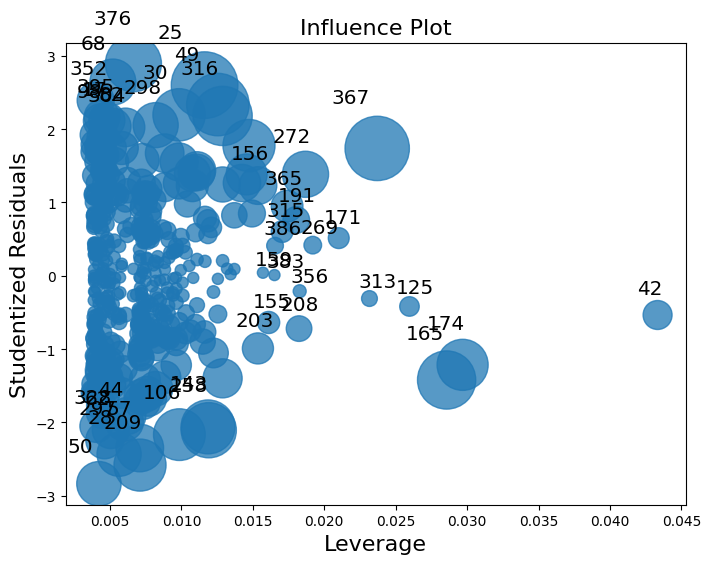

In [ ]:
# Get influence measures from the model... no idea
influence = model.get_influence()
studentized_resid = influence.resid_studentized_external
leverage = influence.hat_matrix_diag

# Thresholds
n = model.nobs
p = model.df_model + 1  # +1 for the intercept
leverage_threshold = 2 * p / n

# Identify potential issues
outliers = abs(studentized_resid) > 2
high_leverage = leverage > leverage_threshold

print("Potential outliers (|studentized residual| > 2):", outliers.sum())
print("High leverage points (leverage > 2p/n):", high_leverage.sum())

# Optional: Visualize influence
fig, ax = plt.subplots(figsize=(8, 6))
sm.graphics.influence_plot(model, ax=ax, criterion="cooks")
plt.show()

12. This problem involves simple linear regression without an intercept.

    a. Recall that the coefficient estimate βˆ for the linear regression of Y onto X without an intercept is given by (3.38). Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

    - The coefficient estimate for the regression of Y onto X (no intercept) is the same as the coefficient estimate for the regression of X onto Y (no intercept) when the variances of X and Y are equal?

    b. Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is different from the coefficient estimate for the regression of Y onto X.

In [59]:
# random seed
np.random.seed(42)

# Generate 100 observations
n = 100
X = np.random.normal(loc=0, scale=1, size=n)
Y = 2 * X + np.random.normal(scale=1, size=n) # add noise?

# Regress Y onto X (no intercept)
model_Y_on_X = sm.OLS(Y, X).fit()
beta_Y_on_X = model_Y_on_X.params[0]

# Regress X onto Y (no intercept)
model_X_on_Y = sm.OLS(X, Y).fit()
beta_X_on_Y = model_X_on_Y.params[0]

# Show both estimates
print(f"β̂ for Y onto X (no intercept): {beta_Y_on_X:.4f}")
print(f"β̂ for X onto Y (no intercept): {beta_X_on_Y:.4f}")

β̂ for Y onto X (no intercept): 1.8558
β̂ for X onto Y (no intercept): 0.4113


c. Generate an example in Python with n = 100 observations in which the coefficient estimate for the regression of X onto Y is the same as the coefficient estimate for the regression of Y onto X.

In [60]:
# random seed
np.random.seed(42)

# Generate 100 observations
n = 100
X = np.random.normal(loc=0, scale=1, size=n)
Y = X

# Regress Y onto X (no intercept)
model_Y_on_X = sm.OLS(Y, X).fit()
beta_Y_on_X = model_Y_on_X.params[0]

# Regress X onto Y (no intercept)
model_X_on_Y = sm.OLS(X, Y).fit()
beta_X_on_Y = model_X_on_Y.params[0]

# Show both estimates
print(f"β̂ for Y onto X (no intercept): {beta_Y_on_X:.4f}")
print(f"β̂ for X onto Y (no intercept): {beta_X_on_Y:.4f}")

β̂ for Y onto X (no intercept): 1.0000
β̂ for X onto Y (no intercept): 1.0000
